# 移除图像边缘的标签
在科学分析图像时，通常只分析那些完全捕捉到的图像对象是相关的。

In [1]:
import pyclesperanto_prototype as cle
from skimage.segmentation import clear_border, relabel_sequential
from skimage.io import imread
import stackview
import numpy as np

我们的起点应该是一个标签图像；例如通过对blobs.tif进行阈值处理和连通组件标记得到的：

c:\structure\code\pyclesperanto_prototype\pyclesperanto_prototype\_tier9\_imshow.py:34: UserWarning: cle.imshow is deprecated, use stackview.imshow instead.
  warnings.warn("cle.imshow is deprecated, use stackview.imshow instead.")


cl.OCLArray([[ 0,  0,  0, ..., 59, 59, 59],
       [ 0,  0,  0, ..., 59, 59, 59],
       [ 0,  0,  0, ..., 59, 59, 59],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=uint32)
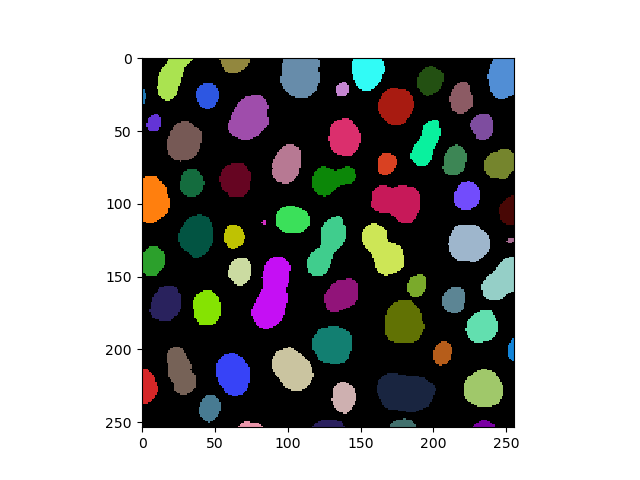

In [2]:
# load data
image = imread('../../data/blobs.tif')

# process the image
blurred = cle.gaussian_blur(image, sigma_x=1, sigma_y=1)
binary = cle.threshold_otsu(blurred)
labeled = cle.connected_components_labeling_box(binary)

# show result
labeled

In [3]:
num_labels = len(np.unique(labeled)) - 1
print("图像中的对象数量：" + str(num_labels))

Number of objects in the image: 62


如果对象的大小很重要，那么应该排除那些没有被完全成像并因此接触图像边缘的对象。

StackViewNDArray([[0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0],
                  ...,
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0]], dtype=uint32)
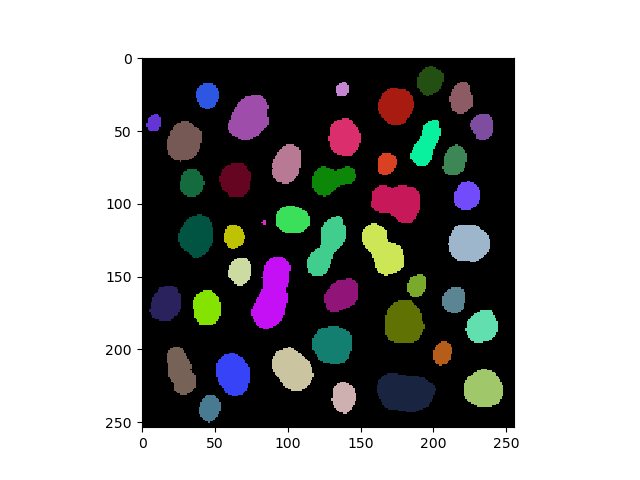

In [4]:
labels_excl_edges = clear_border(np.asarray(labeled))

stackview.insight(labels_excl_edges)

注意，上面标签图像中的最大强度是55，对象数量是44（见下文）。因此，这是一个并非所有1到44之间的标签都存在的标签图像。

In [5]:
num_labels = len(np.unique(labels_excl_edges)) - 1
print("图像中的对象数量：" + str(num_labels))

Number of objects in the image: 44


## 随后的标记
许多用于进一步处理标签图像的算法要求标签是连续标记的。因此，我们需要修复上面的图像。

StackViewNDArray([[0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0],
                  ...,
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0]], dtype=uint32)
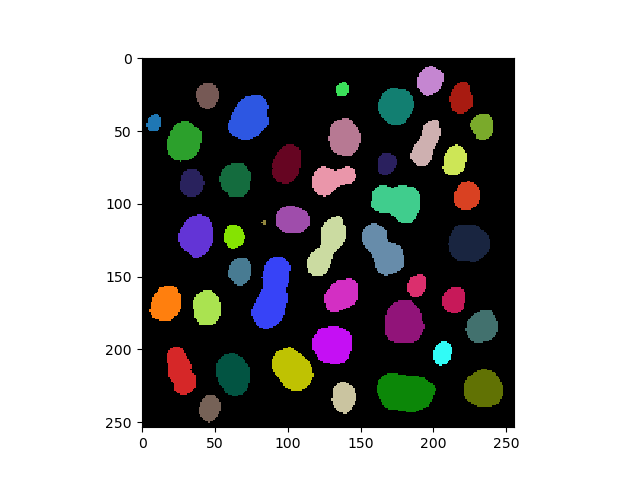

In [6]:
relabeled, _, _ = relabel_sequential(labels_excl_edges)

stackview.insight(relabeled)

其他用于移除图像边缘对象的实现不需要这一步骤：

cl.OCLArray([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint32)
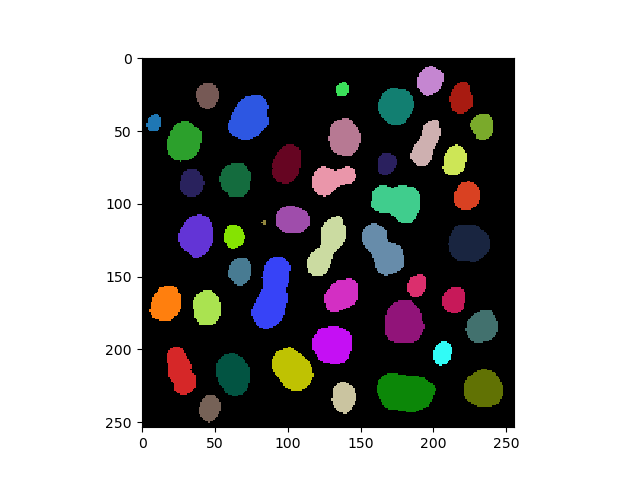

In [7]:
# Exclude Labels On Edges
labels_excl_edges = cle.exclude_labels_on_edges(labeled)

labels_excl_edges

In [8]:
num_labels = len(np.unique(labels_excl_edges)) - 1
print("图像中的对象数量：" + str(num_labels))

Number of objects in the image: 44
